In [2]:
import pandas as pd
from scipy import stats

In [3]:
# Paths to the Excel files, each representing a scenario
excel_files = [
    "C:/Users/golna.GOLNAZ/Desktop/Result/Atmosphere/Potential Air T/X Potential Air Temperature.xlsx",
    "C:/Users/golna.GOLNAZ/Desktop/Result/Atmosphere/Potential Air T/Y Potential Air Temperature.xlsx",
    "C:/Users/golna.GOLNAZ/Desktop/Result/Atmosphere/Potential Air T/Z Potential Air Temperature.xlsx"
]


def test_normality_per_scenario(file_paths):
    results = []
    
    for file_path in file_paths:
        # Load the entire Excel file
        df = pd.read_excel(file_path)
        
        # Assuming the first two columns are 'Date' and 'Hour', we drop them
        df = df.iloc[:, 2:]
        
        # Flatten the DataFrame to a single list of values for the scenario
        scenario_data = df.values.flatten()
        
        # Remove NaN values from the list for the scenario
        scenario_data = [value for value in scenario_data if pd.notnull(value)]
        
        # Perform the Shapiro-Wilk test on the aggregated data for the scenario
        stat, p = stats.shapiro(scenario_data)
        
        # Append the results for this scenario
        results.append({
            'Scenario': file_path.split('/')[-1],  # Extract filename as scenario identifier
            'Shapiro Statistic': stat,
            'P-Value': p
        })
    
    # Convert the results list to a DataFrame for better presentation
    results_df = pd.DataFrame(results)
    return results_df


# Run the normality test for each scenario and get the results in a DataFrame
normality_test_results_df = test_normality_per_scenario(excel_files)

# Display the results DataFrame
print(normality_test_results_df)

                           Scenario  Shapiro Statistic       P-Value
0  X Potential Air Temperature.xlsx           0.859606  1.074967e-17
1  Y Potential Air Temperature.xlsx           0.863453  1.889667e-17
2  Z Potential Air Temperature.xlsx           0.862166  1.562756e-17


In [ ]:
#Boxplot

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For enhanced boxplot aesthetics

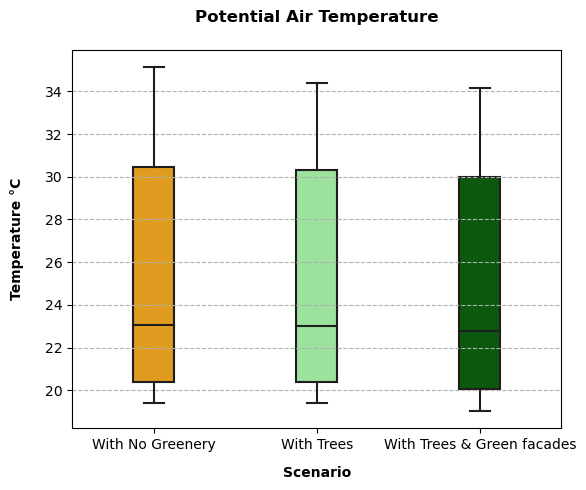

In [5]:
# Correct definition of excel_files as a dictionary with scenarios as keys and file paths as values
excel_files = {
    'With Trees':                  "C:/Users/golna.GOLNAZ/Desktop/Result/Atmosphere/Potential Air T/X Potential Air Temperature.xlsx",
    'With Trees & Green facades':  "C:/Users/golna.GOLNAZ/Desktop/Result/Atmosphere/Potential Air T/Y Potential Air Temperature.xlsx",
    'With No Greenery':            "C:/Users/golna.GOLNAZ/Desktop/Result/Atmosphere/Potential Air T/Z Potential Air Temperature.xlsx"
}

# Prepare an empty DataFrame for aggregating data
aggregated_data = pd.DataFrame()

# Load and aggregate data from each scenario
for scenario, file_path in excel_files.items():
    df = pd.read_excel(file_path)
    # Assuming the relevant data starts from the third column
    scenario_data = df.iloc[:, 2:].melt(value_vars=df.columns[2:])
    scenario_data['Scenario'] = scenario  # Add a column to label the scenario
    aggregated_data = pd.concat([aggregated_data, scenario_data[['Scenario', 'value']]], ignore_index=True)

plt.figure(figsize=(6, 5))
sns.boxplot(x='Scenario', y='value', data=aggregated_data, width=1/4, order=['With No Greenery', 'With Trees', 'With Trees & Green facades'], palette=['orange', 'lightgreen', 'darkgreen'])
plt.title('Potential Air Temperature', fontweight='bold', pad=20)  # Title with bold fontweight
plt.ylabel('Temperature °C', fontweight='bold', labelpad=15)
plt.xlabel('Scenario', fontweight='bold', labelpad=10)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()